## Most basic timeseries
Let's get started by importing necessary libraries:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

The data used here provides the evolution of the bitcoin price between 2013 and 2019. You can read more about it [here](https://www.data-to-viz.com/story/TwoNumOrdered.html). It has 2 columns. One is a date and must be recognized as it thanks to the `to_datetime()` function of `pandas`. The other is a price in $.

In [3]:
# Read data
data = pd.read_csv(
    "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", 
    delim_whitespace=True
)

# Let's make sure 'date' is actually a date in pandas
data["date"] = pd.to_datetime(data["date"])

date = data["date"]
value = data["value"]

A basic time series plot is obtained the same way than any other line plot -- with `plt.plot(x, y)` or `ax.plot(x, y)`. The only difference is that now `x` isn't just a numeric variable, but a date variable that Matplotlib recognizes as such.

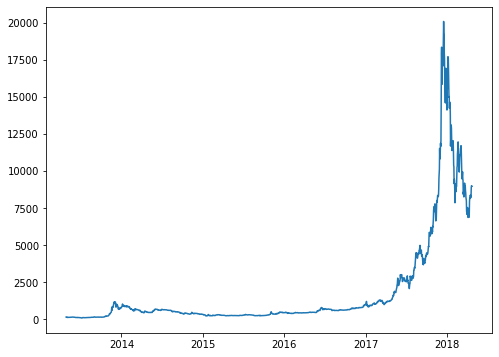

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value);

Nice! That's a pretty good start and we now have a good insight of the evolution of the bitcoin price.

## Dealing with dates on the X axis

Everything worked as expected in this case because both the `date` and `value` variables were appropriately sorted beforehand. It's possible that in your case it's needed to sort the datetimes to ensure they are plotted in the proper order.

What if we want to have tick marks and tick labels for something different than a year? Matplotlib comes with a `dates` module that is going to help us to work with the dates on the horizontal axis.

In [5]:
import matplotlib.dates as mdates

This module contains several `*Locator` and `*Formatter` clasess that can be used to locate tick marks and format tick labels, respectively. 

Let's use `MonthLocator` and `DateFormatter`. `MonthLocator` has an `interval` argument that specifies the number of months of separation between each tick mark.

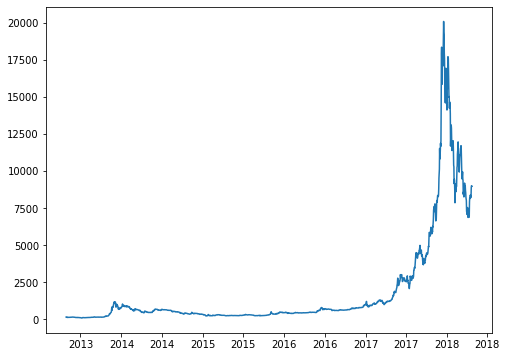

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.

ax.plot(date, value);

Although it's true there's a tick mark every 6 months, it only shows the same year twice without giving information about the month. This is becauLet's use the `DateFormatter` to tell Matplotlib to include the month as well.

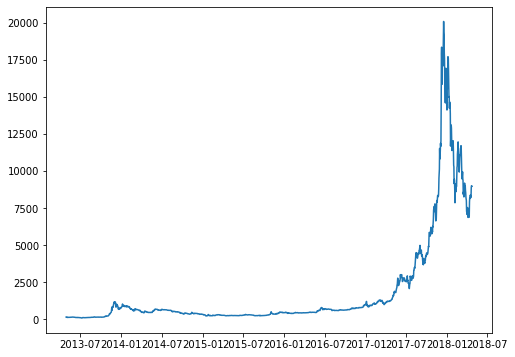

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value);

It's possible to automatically adjust the rotation of the labels with the magical help of `fig.autofmt_xdate()`.

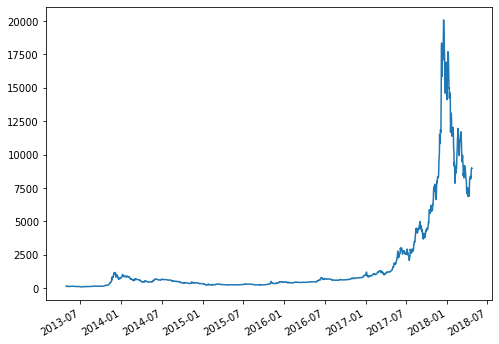

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

# Same as above
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date, value)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

## Add minor tick marks

It's also possible to add minor tick marks for the other months. This also uses `mdates.MonthLocator`, but leaving its arguments unspecified, which is equivalent to setting `interval=1`.

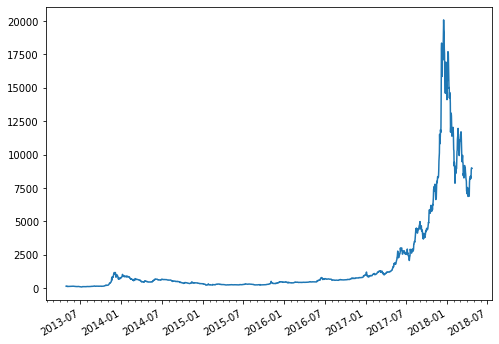

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date, value)

fig.autofmt_xdate()

Let's create another date formatter to see how versatile this is. More information about how to work with datetime formats in Python can be found [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [10]:
# Example: June, 2018
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.

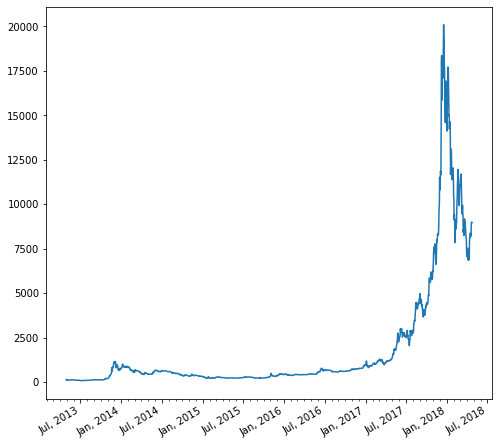

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(date, value)

fig.autofmt_xdate()